<h1>Содержание:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследование-и-предобработка-данных" data-toc-modified-id="Исследование-и-предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-неявных-дубликатов" data-toc-modified-id="Обработка-неявных-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка неявных дубликатов</a></span></li><li><span><a href="#Исследование-целевого-признака-'Температура'" data-toc-modified-id="Исследование-целевого-признака-'Температура'-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование целевого признака 'Температура'</a></span></li><li><span><a href="#Исследование-категориальных-признаков" data-toc-modified-id="Исследование-категориальных-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование категориальных признаков</a></span></li><li><span><a href="#Исследование-числовых-признаков" data-toc-modified-id="Исследование-числовых-признаков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Исследование числовых признаков</a></span></li></ul></li><li><span><a href="#Подготовка-данных-к-обучению-меделей-(трансформирование-признаков)" data-toc-modified-id="Подготовка-данных-к-обучению-меделей-(трансформирование-признаков)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных к обучению меделей (трансформирование признаков)</a></span></li><li><span><a href="#Декомпозиция-(PCA)" data-toc-modified-id="Декомпозиция-(PCA)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Декомпозиция (PCA)</a></span></li><li><span><a href="#Построение-безлайн-модели-LinearRegression" data-toc-modified-id="Построение-безлайн-модели-LinearRegression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построение безлайн модели LinearRegression</a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Feature Engineering</a></span></li></ul></li><li><span><a href="#Построение-базовой-нейронной-сети" data-toc-modified-id="Построение-базовой-нейронной-сети-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Построение базовой нейронной сети</a></span></li><li><span><a href="#Улучшение-нейронной-сети" data-toc-modified-id="Улучшение-нейронной-сети-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Улучшение нейронной сети</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Рекомендации:" data-toc-modified-id="Рекомендации:-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Рекомендации:</a></span></li></ul></li></ul></div>

# Прогнозирование температуры звезд

**Заказчик** - обсерватория **«Небо на ладони»**.

**Задача:** c помощью нейросети определять температуру на поверхности обнаруженных звёзд. Обычно для расчёта температуры учёные пользуются следующими методами:
- Закон смещения Вина.
- Закон Стефана-Больцмана.
- Спектральный анализ.
Каждый из них имеет плюсы и минусы. Обсерватория хочет внедрить технологии машинного обучения для предсказания температуры звёзд, надеясь, что этот метод будет наиболее точным и удобным.
В базе обсерватории есть характеристики уже изученных 240 звёзд.

Заказчику важны:

- удобство метода;
- точность метода;
- метрика **RMSE** не должна превышать **4500**.

**ПЛАН ВЫПОЛНЕНИЯ ЗАДАЧИ:**
1. Загрузка данных;
2. Анализ данных (EDA data). Опредение зависимостей признаков и их важности для обучения моделей;
3. Предобработка данных по результатам EDA-анализа. Масштабирование числовых и обработка категориальных признаков.
3. Разбивка данных на обучающую и тестовую выборки;
4. Создание класса для задания архитектуры нейронной сети (подбор скрытых слоев и нейронов, функций активации, сравнение комбинаций). **Бейзлайн модель**;
5. Обучение нейронной сети с построением графика «Факт — Прогноз», где по горизонтальной оси будут отложены условные номера звёзд, а по вертикальной — температура в Кельвинах;
6. Создание решения с перебором параметров нейросети (`«dropout»` и `«batchsize»`);
7. Обучение нейронной сети с построением графика «Факт — Прогноз»;
8. Вывод результатов работы нейронной сети, так же в виде графика или таблицы. Сравнение **Baseline модели** и **модели с подобранными параметрами**. 

## Загрузка данных

In [1]:
!pip install skorch

# импорт библиотек для работы
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
from skorch import NeuralNetRegressor

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# общие настройки для отрисовки графиков
sns.set_theme(context='notebook', style='darkgrid', font='sans-serif', font_scale=1, palette='deep')

# константные значения
RAND_ST = 777

In [3]:
# загрузка данных в датафрейм
df = pd.read_csv('/datasets/6_class.csv', index_col='Unnamed: 0')

# вывод первых 10 наблюдений
df.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red
5,2840,0.000650,0.1100,16.98,0,Red
6,2637,0.000730,0.1270,17.22,0,Red
7,2600,0.000400,0.0960,17.40,0,Red
8,2650,0.000690,0.1100,17.45,0,Red
9,2700,0.000180,0.1300,16.05,0,Red


In [4]:
# вывод основной информации по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 13.1+ KB


Объем представленных данных: 240 наблюдений, 6 признаков.
Данные имеют следующие признаки:

- **`'Temperature (K)'` — емпература на поверхности звезды в Кельвинах | числовой дискретный признак | тип данных - `int`**;
- `'Luminosity(L/Lo)'` — светимость звезды относительно Солнца | числовой непрерывный признак | тип данных - `float`;
- `'Radius(R/Ro)'` — радиус звезды относительно радиуса Солнца | числовой непрерывный признак | тип данных - `float`;
- `'Absolute magnitude(Mv)'` — физическая величина, характеризующая блеск звезды | числовой непрерывный признак | тип данных - `float`;
- `'Star type'` — тип звезды | категориальный порядковый признак | тип данных - `int`;
- `'Star color'` — цвет звезды, который определяют на основе спектрального анализа | категориальный строковый признак | тип данных - `object`.

Признак **`'Temperature (K)'`** является **целевым**.

## Исследование и предобработка данных

In [5]:
# вывод описательных и статистических данных по числовым признакам
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


Отрицательные значения присутствуют только в признаке `'Absolute magnitude(Mv)'`, что допустимо, исходя из формулы для расчета этого показателя: 

$$
  -2,5 * lg * \frac {L_1} {L_2} 
$$

Каких-либо значимых аномальных значений в данных не обнаружено.

Приведем названия признаков к общему стилю согласно REP-8.

In [6]:
# переименование признаков
df = df.rename(columns={'Temperature (K)': 'temp',
                        'Luminosity(L/Lo)': 'luminos',
                        'Radius(R/Ro)': 'radius',
                        'Absolute magnitude(Mv)': 'abs_magnitude',
                        'Star type': 'star_type',
                        'Star color': 'star_color'})

### Обработка неявных дубликатов

Проверка категориальной переменной `'star_color'` на наличие неявных дубликатов.

In [7]:
# вывод уникальных значений по категориальному признаку 'star_color'
np.sort(df['star_color'].unique())

array(['Blue', 'Blue ', 'Blue White', 'Blue white', 'Blue white ',
       'Blue-White', 'Blue-white', 'Orange', 'Orange-Red',
       'Pale yellow orange', 'Red', 'White', 'White-Yellow', 'Whitish',
       'Yellowish', 'Yellowish White', 'white', 'yellow-white',
       'yellowish'], dtype=object)

В категориальном признаке обнаружено множество неявных дубликатов, например значения 'Blue White' и 'Blue white'. Далее будет проведена обработка таких дубликатов (приведение к нижнему регистру, удаление лишних пробелов, добавление символа `'-'` между словами).

In [8]:
# обрезка лишних пробелов
df['star_color'] = df['star_color'].str.strip()
# приведение к нижнему регистру
df['star_color'] = df['star_color'].str.lower()
# замена пробела на символ подчеркивания между словами 
df['star_color'] = df['star_color'].replace(regex=r'[ ]', value=r'-')

# повторный вывод уникальных значений по категориальному признаку 'star_color'
np.sort(df['star_color'].unique())

array(['blue', 'blue-white', 'orange', 'orange-red', 'pale-yellow-orange',
       'red', 'white', 'white-yellow', 'whitish', 'yellow-white',
       'yellowish', 'yellowish-white'], dtype=object)

### Исследование целевого признака 'Температура'

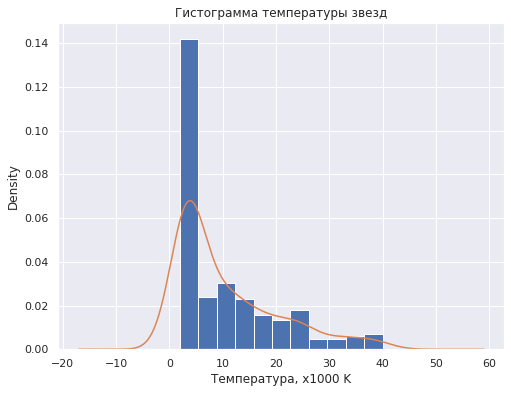

In [9]:
# вывод гистограммы по целевому признаку
ax = (df['temp'] / 1000).plot.hist(figsize=(8, 6), density=True, bins=11)
(df['temp'] / 1000).plot.density(ax=ax)
ax.set_xlabel('Температура, x1000 K')
ax.set_title('Гистограмма температуры звезд');

Распределение значений температуры звезд по всей выбрке скошено в правую сторону (длинный правый хвост). Пик значений находится в районе **2000 - 4000** K, с резким спадом после этих значений  и дальнейшим плавным затуханием. Можно выдвинуть как минимум два предположения:
- звезды с температурой поверхности от 2000 до 4000 K намного чаще встречаются в ближайшем космосе, чем другие;
- интерес ученых 'прикован' в большей степени к звездам с температурой поверхности от 2000 до 4000 K, поэтому в представленной выборке их больше.

Межквартильный размах по целевому признаку составляет: 3344.25 - 15055.5 К
Медиана: 5776.0 K
Среднее значение: 10497.46 K
Стандартное отклонение: 9552 K
Основной размах данных: 1939 - 32622.375 K


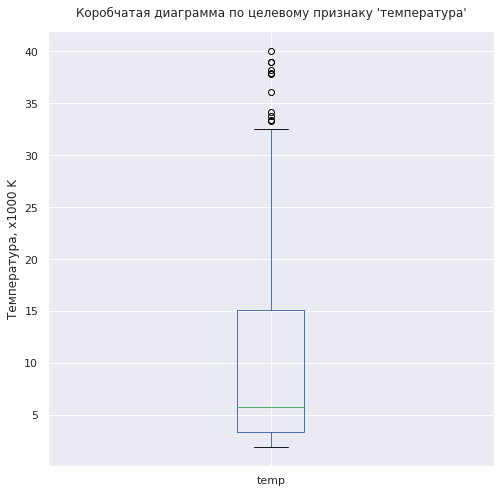

In [10]:
# вывод основых статистических данных по целевому признаку
q1 = df['temp'].quantile(.25)
q3 = df['temp'].quantile(.75)
iqr = q3 - q1
print(f"Межквартильный размах по целевому признаку составляет: {q1} - {q3} К")
print(f"Медиана: {df['temp'].median()} K")
print(f"Среднее значение: {round(df['temp'].mean(), 2)} K")
print(f"Стандартное отклонение: {int(df['temp'].std())} K")
print(f"Основной размах данных: {df['temp'].min()} - {q3 + iqr * 1.5} K")

# вывод коробчатой диаграммы по целевому признаку
ax = (df['temp'] / 1000).plot.box(figsize=(8, 8))
ax.set_title("Коробчатая диаграмма по целевому признаку 'температура'", y=1.02)
ax.set_ylabel('Температура, x1000 K');

Исходя из представленной коробчатой диаграммы и статистических данных:
- **межквартильный размах** по целевому признаку составляет: **3344.25 - 15055.5 К**;
- **медиана 5776.0 K**;
- **cреднее значение 10497.46 K**;
- **cтандартное отклонение: 9552 K**;
- **основной размах данных: 1939 - 32622.375 K**;
- **значения выше 32622 K** можно было бы **считать выбросами**, но лучше всего проверить гипотезу о том, что звезды с такой высокой температурой представляют собой определенную (возможно особенную) группу.

In [11]:
# создание временной метки (признака) горячих звезд
df['temp_anomal'] = 0
df.loc[df['temp'] > 32622, 'temp_anomal'] = 1
# вывод звезд с самыми высокими температурами по выборке
df.query('temp_anomal == 1')

,temp,luminos,radius,abs_magnitude,star_type,star_color,temp_anomal
30,39000,204000.0,10.60,-4.70,3,blue,1
49,33750,220000.0,26.00,-6.10,4,blue,1
99,36108,198000.0,10.20,-4.40,3,blue,1
100,33300,240000.0,12.00,-6.50,4,blue,1
101,40000,813000.0,14.00,-6.23,4,blue,1
109,33421,352000.0,67.00,-5.79,4,blue,1
159,37800,202900.0,6.86,-4.56,3,blue,1
214,34190,198200.0,6.39,-4.57,3,blue,1
231,38234,272830.0,1356.00,-9.29,5,blue,1
235,38940,374830.0,1356.00,-9.93,5,blue,1


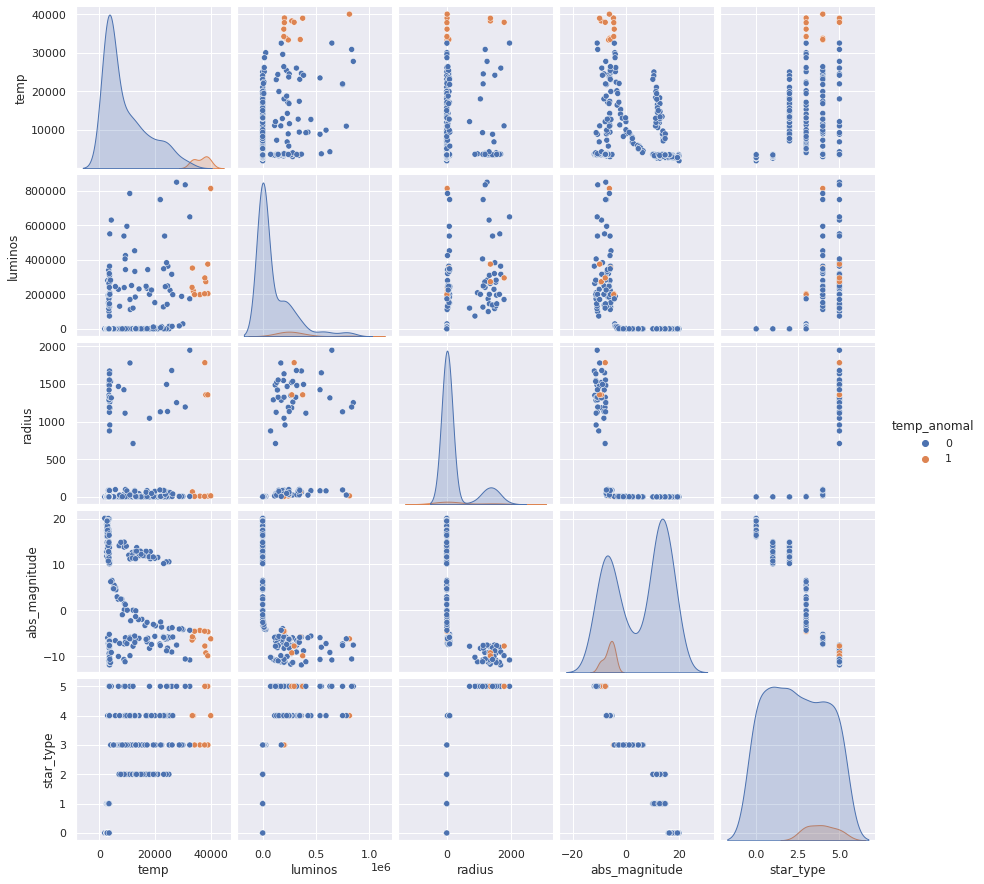

In [12]:
# вывод парных графиков распределений по каждому признаку с учетом группы горячих звезд
sns.pairplot(df, hue='temp_anomal');

По представленным данным можно предположить, что `'горячие звезды'` (с высокой температурой) чаще характерны для звезд:
- в **синем цветовом диапазоне**;
- **3**, **4** и **5-го типа**;
- с **отрицательной абсолютной звёздной величиной**.

Таким образом считать выбросами такие данные вряд ли возможно.

### Исследование категориальных признаков

Проведем анализ количества звезд, представленных в каждой категории.

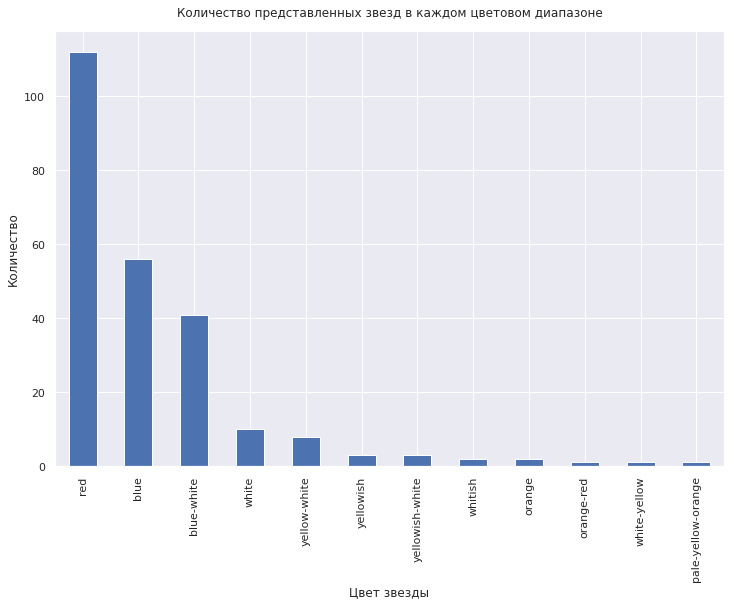

In [13]:
# вывод графика количества представленных звезд в цветовом диапазоне
ax = df['star_color'].value_counts().plot.bar(figsize=(12, 8))
ax.set_title('Количество представленных звезд в каждом цветовом диапазоне', y=1.02)
ax.set_xlabel('Цвет звезды')
ax.set_ylabel('Количество');

На графике хорошо видно, что:
- **Больше всего (более 100) звезд** в данных представлены **в красном диапазоне**; 
- далее по убыванию количества располагаются звезды **в синем и бело-синем диапазоне (их менее 60 в каждой группе)**; 
- в остальных группах звезд **намного меньше (менее 10)**.

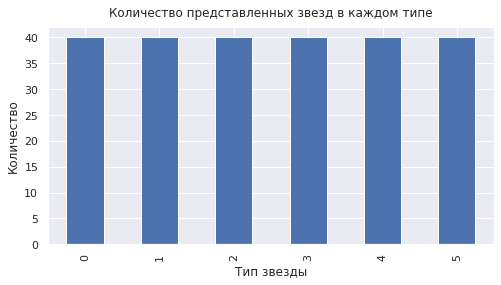

In [14]:
# вывод графика количества представленных звезд по каждому типу 
ax = df['star_type'].value_counts().plot.bar(figsize=(8, 4))
ax.set_title('Количество представленных звезд в каждом типе', y=1.02)
ax.set_xlabel('Тип звезды')
ax.set_ylabel('Количество');

В каждом типе представлено по **40 звезд**. Возможно выборка стратифицирована по типу звезд, т.е. из каждого типа выбрано по 40 звезд для исследования.

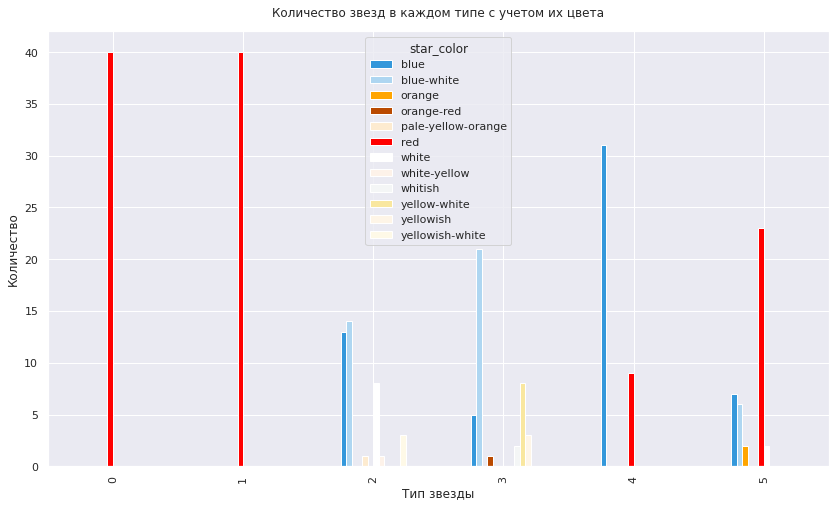

In [15]:
# цвета для отрисовки графиков в соответствии с признаком star_color
color_ = {'red': 'red',
          'blue-white': '#AED6F1',
          'white': 'white',
          'yellowish-white': '#FEF9E7',
          'pale-yellow-orange': '#FDEBD0',
          'blue': '#3498DB',
          'whitish': '#F4F6F6',
          'yellow-white': '#F9E79F',
          'orange': 'orange',
          'white-yellow': '#FDF2E9',
          'yellowish': '#FEF5E7',
          'orange-red': '#BA4A00'}
# вывод графика количества звезд в каждом типе с учетом их цвета
ax = pd.crosstab(df['star_type'], df['star_color']).plot.bar(figsize=(14, 8), color=color_)
ax.set_title('Количество звезд в каждом типе с учетом их цвета', y=1.02)
ax.set_ylabel('Количество')
ax.set_xlabel('Тип звезды');

Из графика можно выделить следующие особенности:
- `'0'` (`'коричневый карлик'`) и `'1'` (`'красный карлик'`) группы (типы) представленны звездами **только в красном цветовом диапазоне**, что соответствует названию типов;
- в `'4'` (`'сверхгиганты'`) группе находятся звезды **только в синем и красном цветовом диапазоне**;
- в группах `'2'` (`'белый карлик'`), `'3'` (`'звезды главной последовательности'`) и `'5'` (`'гипергиганты'`) есть звезды из **не менее чем 5-ти различных цветовых диапазонов**;
- во `'2'` (`'белый карлик'`) группе звезды **из красного и оранжево-красного диапазонов отсутствуют**, что соответствует логике названия типа.

Далее проведем анализ распределения звезд по температуре в зависимости от категории каждого категориального признака. 

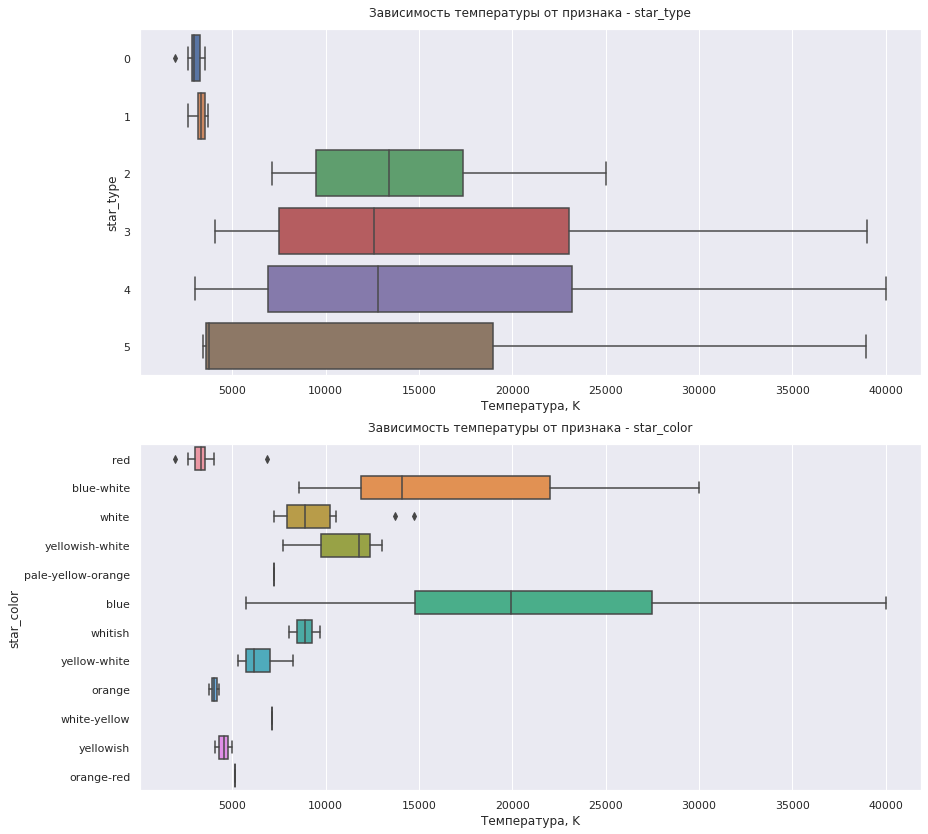

In [16]:
# список категориальных признаков
cat_cols = ['star_type', 'star_color']
# вывод 2-х графиков зависимости по двум категориальным признакам
plt.figure(figsize=(14, 14))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 1, i+1)
    sns.color_palette("pastel")
    sns.boxplot(data=df, x='temp', y=col, orient='h')
    plt.ylabel(col)
    plt.xlabel('Температура, K')
    plt.title(f'Зависимость температуры от признака - {col}', y=1.02)
plt.show();

Из графика зависимости температуры от **типа звезды** видно, что:
- `'0'` и `'1-й тип'` звезд образуют обособленную группу звезд **с низкой температурой (до 5000 K)**. **Дисперсия** температур так же **минимальна** в отличии от других типов звезд;
- `'2'`, `'3'`, `'4'` и `'5-я типы'` звезд образуют группу звезд с **более высокой температурой** и **большой дисперсией**. В этой группе так же отмечается наличие `'горячих звезд'` **с самыми высокими температурами**.
- **50% звезд (медиана)** из `'5-го типа'` имеют **не высокую температуру (до 5000 K)**, но остальные звезды достигают и более высоких значений, что еще раз говорит о высокой дисперсии.

Из графика зависимости температуры от **цвета звезды** видно, что:
- звезды в определенном цветовом диапазоне имеют свой **характерный диапазон температур**;
- `'синие'` и `'бело-синие'` звезды имеют **большую дисперсию по температуре** в отличие от остальных звезд; 
- у `'красных'` и `'белых'` звезд есть **выбросы по температуре**.

Признак `'star_color'` может быть хорошей прогностической переменной для предсказания температуры звезд.

### Исследование числовых признаков

Далее будет проведен анализ численных признаков.

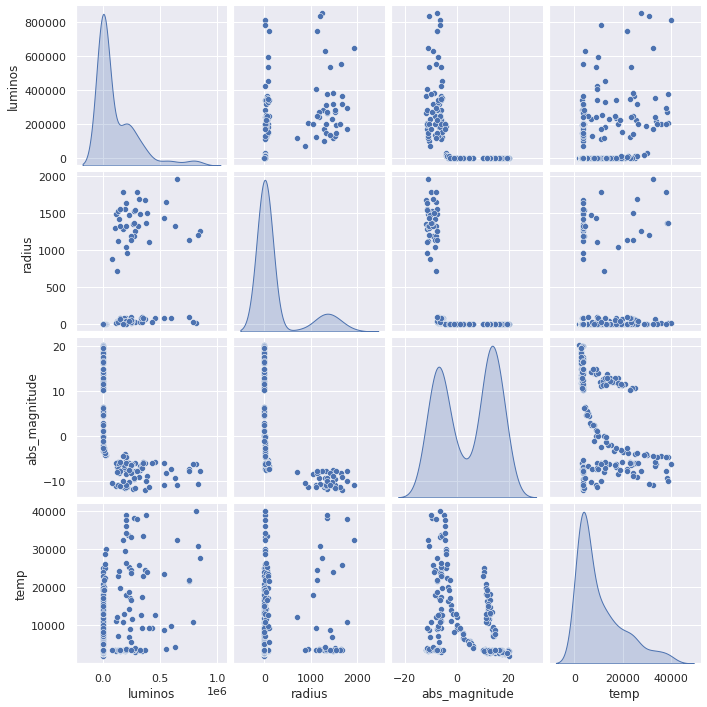

In [17]:
# вывод попарного графика распределения числовых признаков
sns.pairplot(df[['luminos', 'radius', 'abs_magnitude', 'temp']], diag_kind='kde');

На графиках распределения числовых признаков можно видеть, что:
- какой-либо явной **линейной зависимости** между признаками **нет**, включая мультиколинеарность;
- распределения числовых признаков **не соотвествуют нормальному распределению**;
- по признаку `'abs_magnitude'` и целевому признаку `'temp'` **наблюдаются определенные паттерны в распределении** звезд. 

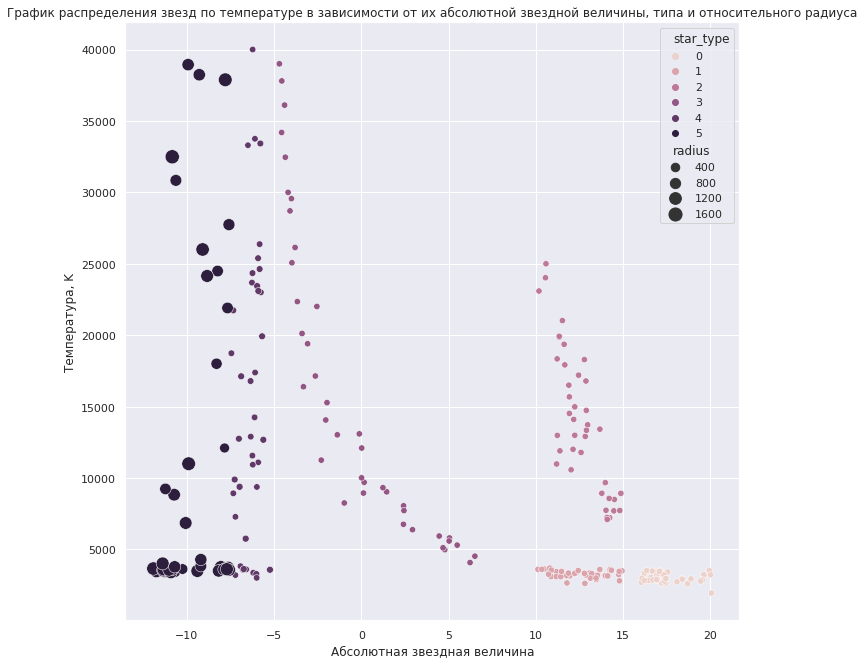

In [18]:
# вывод графика распределения звезд по температуре, типу, абсолютной звездной величине и радиусу
plt.figure(figsize=(11, 11))
ax = sns.scatterplot(data=df, y='temp', x='abs_magnitude', hue='star_type', size='radius', sizes=(40, 200))
ax.set_title('График распределения звезд по температуре в зависимости от их абсолютной звездной величины, типа и относительного радиуса')
ax.set_xlabel('Абсолютная звездная величина')
ax.set_ylabel('Температура, K');

На графике хорошо видно:
- звезды **разных типов** имеют свое **характерное** распределение по темепературе в зависимости от `абсолютной звездной величины`. Так же они образуют **обособленные** и **интересные** с точки зрения формы **кластеры**;
- относительно **большие звезды** характерны для **5-го типа** и имеют **отрицательную** `абсолютную звездную величину`, которая **ниже** чем в остальных типах. Так же звезды этого типа **могут достигать очень высоких значений по температуре**;
- какой-либо **явной зависимости температуры** звезд **4-го и 5-го типа** от их `абсолютной звездной величины` **не наблюдается**. **Диапазон** (дисперсия) значений **температур очень высокий**;
- **температура** звезд **3-го типа** **с увеличением** из `абсолютной звездной величины` **снижается по эскпоненте**. **Диапазон** (дисперсия) значений **температур очень высокий**;
- **температура** звезд **2-го типа** **с увеличением** из `абсолютной звездной величины` **линейно снижается** с большой интенсивностью. **Диапазон** (дисперсия) значений **температур не высокий**;
- **температура** звезд **1-го  и 0-го типов** и  **с увеличением** из `абсолютной звездной величины` **незначительно линейно снижается**. **Диапазон** (дисперсия) значений **температур очень низкий**. **Интересное наблюдение здесь:** можно предположить что звезды этих типов продалжают **экспоненциальное падение** звезд **3-го типа** по **температуре** после небольшого разрыва в линии.

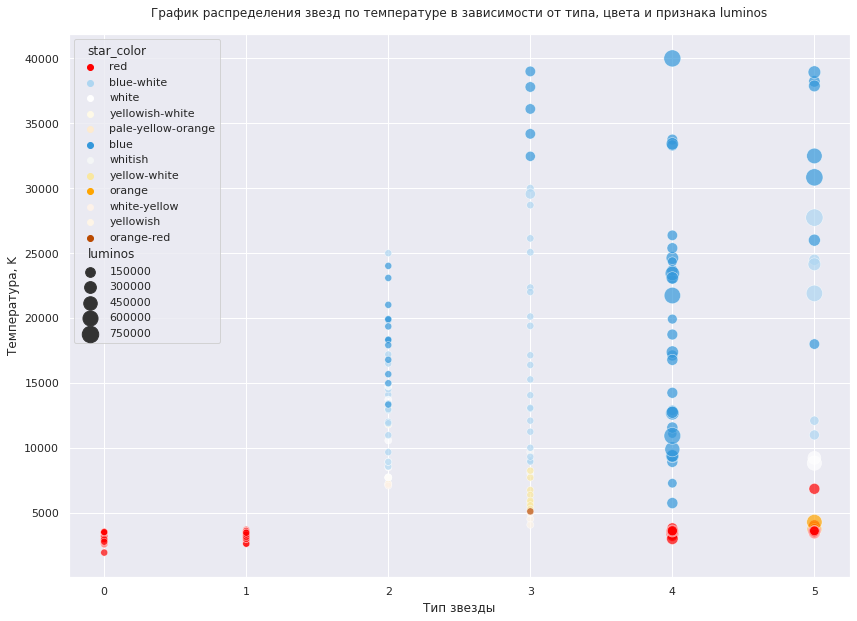

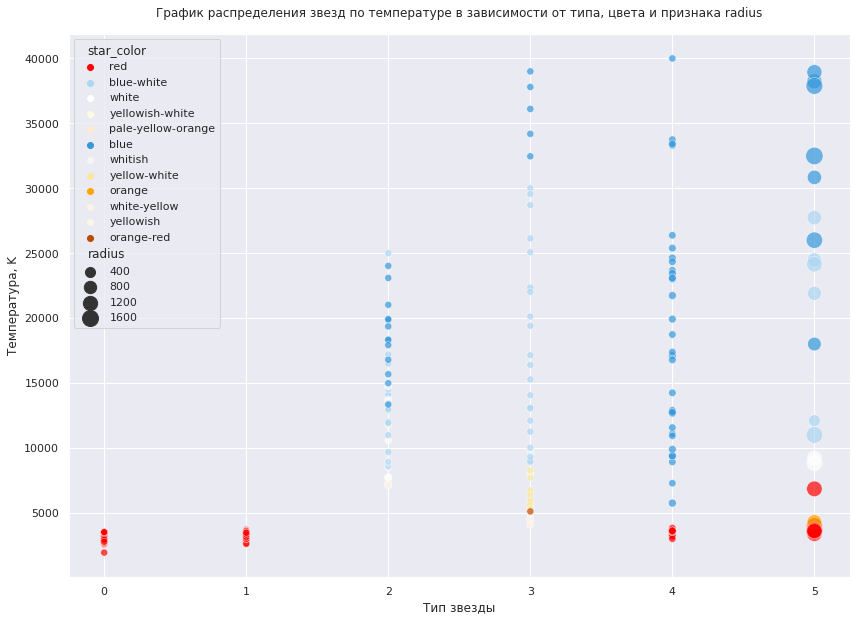

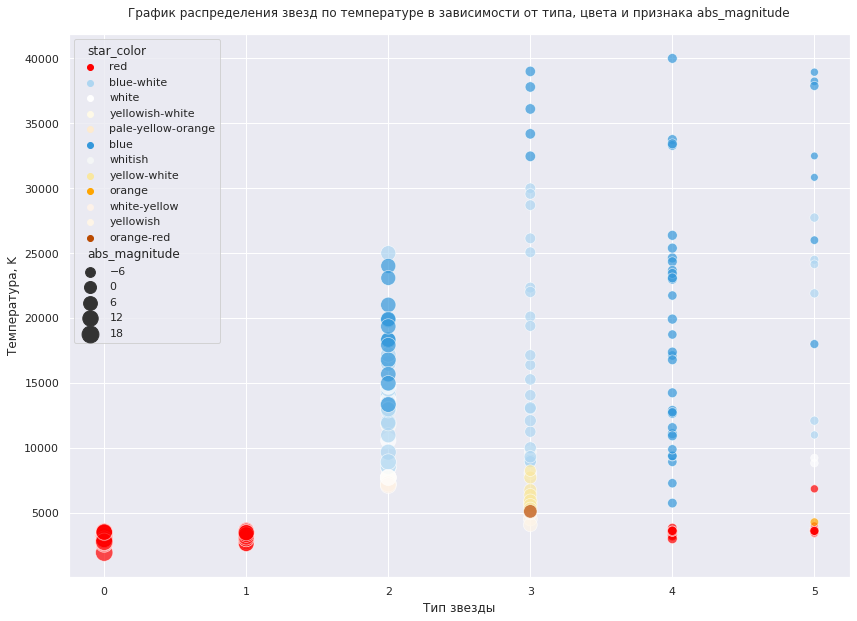

In [19]:
# вывод 3-х графиков распределения звезд по температуре в зависимости от типа, цвета и 3-х числовых признаков
sizes_ = (50, 300)
for col in ['luminos', 'radius', 'abs_magnitude']:
    plt.figure(figsize=(14, 10))
    ax = sns.scatterplot(data=df, 
                         x='star_type', 
                         y='temp', 
                         hue='star_color', 
                         palette=color_, 
                         size=col, 
                         sizes=sizes_,
                         alpha=0.7)
    ax.set_title(f'График распределения звезд по температуре в зависимости от типа, цвета и признака {col}', y=1.02)
    ax.set_xlabel('Тип звезды')
    ax.set_ylabel('Температура, K')
    plt.show();

Общие выводы исходя из графиков:
- `относительная светимость` звезд **4-го и 5-го типа** имеет **самые высокие значения**. Какой-либо взаимосвязи между `относительной светимостью` и `температурой` звезд **на первом графике не наблюдается**, кроме звезд **3-го типа**, где при `температуре` **выше 30000 К** `относительная светимость` звезд выше, чем у остальных в этой группе;
- **по второму графику** можно сказать, что `относительный радиус` звезды не связан с её `температурой`;
- как уже было определено ранее, звезды разбиваются на **кластеры** в зависимости от их `температуры`, `абсолютной звездной величины` и `типа`. С **ростом** значения порядкового признака `тип звезды` (от `коричневого карлика` до `гипергиганта`) **снижается** значение `абсолюстной звездной величины`.

**Выводы:**
Таким образом, исходя из поставленной задачи определения температуры поверхности звезд по остальным представленным признакам, после этапа анализа данных можно описать характерные особенности звезд.
1. **'Горячие' звёзды:**
- **встречаются реже** чем более **холодные звезды** исходя из выборки; 
- имеют **синий цвет** по спектрограмме;
- имеют **низкую** (отрицательную) `абсолютную звездную величину`;
- входят в 3-й, 4-й или 5-й тип (**звёзды главной последовательности**, **сверхгиганты**, **гипергиганты**);
- могут быть как с большим так и с малым `относительным радиусом`;
- имеют **более высокое** значение `относительной светимости`.

2. **'Холодные' звёзды:**
- **встречаются чаще** чем более **горячие звезды** исходя из выборки; 
- чаще имеют **красный цвет** по спектрограмме;
- имеют **высокую** (положительную) `абсолютную звездную величину`;
- входят в 0-й или 1-й тип (**коричневый карлик**, **красный карлик**);
- с **небольшим** `относительным радиусом`;
- имеют **низкое** значение `относительной светимости`.

## Подготовка данных к обучению меделей (трансформирование признаков)

In [20]:
# логарифм признаков luminos и radius для выравнивания значений
df['log_luminos'] = np.log10(df['luminos'])
df['log_radius'] = np.log10(df['radius'])
# определение категориальных и числовых признаков
cat_cols = ['star_color']
num_cols = ['log_luminos', 'log_radius', 'abs_magnitude', 'star_type']

# для преобразование числовых данных
scaler = StandardScaler()  
# для преобразования категориальных данных
ohe = OneHotEncoder(sparse=False, handle_unknown='error', drop='first')  

# разбивка данных на обучающую и тестовую выборки
df_train, df_test, target_train, target_test = train_test_split(
    df.drop(columns=['temp']), 
    df.temp, 
    test_size=0.2, 
    shuffle=True,
    stratify=df['star_type'],
    random_state=RAND_ST)

# преобразование данных (стандартизация и OHE-энкодинг)
sc_train = scaler.fit_transform(df_train[num_cols])
sc_test = scaler.transform(df_test[num_cols])
ohe_train = ohe.fit_transform(df_train[cat_cols])
ohe_test = ohe.transform(df_test[cat_cols])

# вывод размерности полученных данных
print(f'Размер числовых данных обучающей выборки: {sc_train.shape}')
print(f'Размер числовых данных тестовой выборки: {sc_test.shape}')
print(f'Размер категориальных данных обучающей выборки: {ohe_train.shape}')
print(f'Размер категориальных данных тестовой выборки: {ohe_test.shape}')

Размер числовых данных обучающей выборки: (192, 4)
Размер числовых данных тестовой выборки: (48, 4)
Размер категориальных данных обучающей выборки: (192, 11)
Размер категориальных данных тестовой выборки: (48, 11)


## Декомпозиция (PCA)

Далее будет применен приницп главных компонент (**PCA**), как способ не снижения, а увеличения признакого пространства за счет добавления к исходным признакам первых двух-четырех главных компонент.

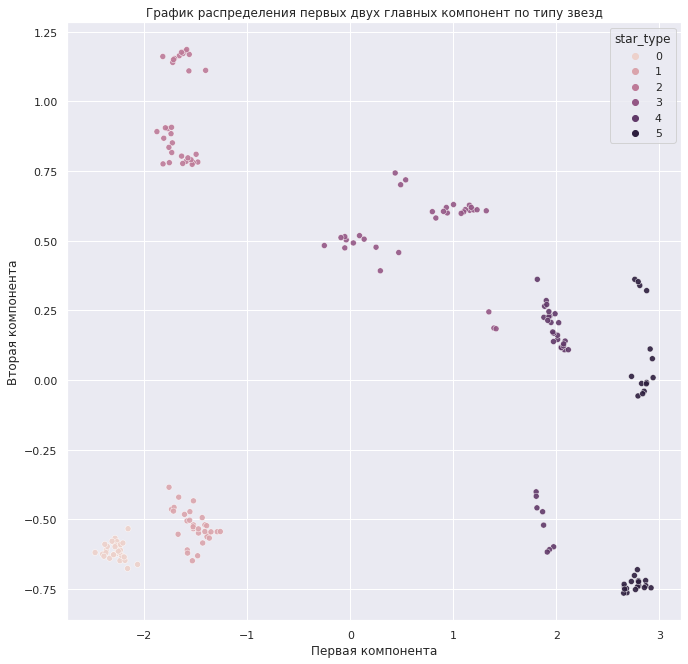

In [21]:
# декомпозиция данных методом PCA с выделением 3-х первых компонент
pca = PCA(n_components=3, random_state=RAND_ST)
pca_train = pca.fit_transform(np.concatenate((sc_train, ohe_train), axis=1))
pca_test = pca.transform(np.concatenate((sc_test, ohe_test), axis=1))
# вывод графика распределения данных в зависимости от первой и второй компоненты, а так же типа звезд
plt.figure(figsize=(11, 11))
ax = sns.scatterplot(x=pca_train[:, 0], y=pca_train[:, 1], hue=df_train['star_type'], alpha=0.9)
ax.set_title('График распределения первых двух главных компонент по типу звезд')
ax.set_xlabel('Первая компонента')
ax.set_ylabel('Вторая компонента');

Данные не плохо кластеризуются по первой и второй компоненте. Данная кластеризация так же отчасти соответствует признаку `'тип звезд'`.

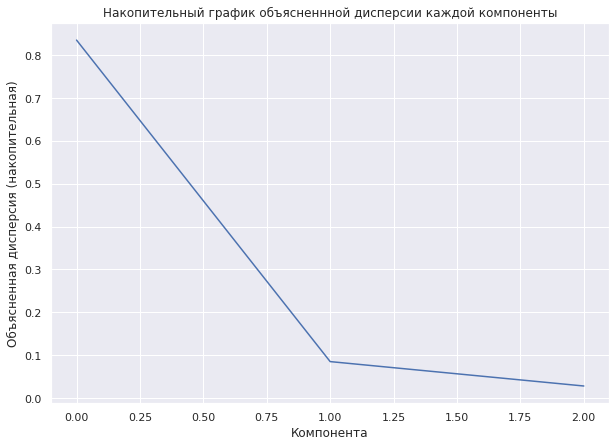

In [22]:
# кумулятивный график объясненнной дисперсии каждой компоненты
plt.figure(figsize=(10, 7))
plt.plot(pca.explained_variance_ratio_)
plt.title('Накопительный график объясненнной дисперсии каждой компоненты')
plt.xlabel('Компонента')
plt.ylabel('Объясненная дисперсия (накопительная)')
plt.show();

## Построение безлайн модели LinearRegression

Для определения предсказательной способности на основе представленных данных будет построена базовая линейная модель регрессии. Так же с учетом **остатков** по обучающей выборке будет создан дополнительный категориальный признак `'StarGroup'`, определяющий группу звезд по их цвету и прогностической способности модели в каждом цветовом спектре.

In [23]:
# базовая линейная модель
lr = LinearRegression()
lr.fit(np.concatenate((sc_train, ohe_train), axis=1), target_train)
lr_pr = lr.predict(np.concatenate((sc_test, ohe_test), axis=1)) 
print('RMSE на тестовой выборке линейной модели:', end='')
print(np.mean((lr_pr - target_test)**2)**.5)

RMSE на тестовой выборке линейной модели:5586.571709942132


### Feature Engineering

In [24]:
# датафрейм с включением остатков предсказания линейной модели на обучающей выборке
# отсортированный по мединному значению остатков в каждой цветовой группе звезд
color_group = pd.DataFrame([
    *pd.DataFrame({
        'StarColor': df_train['star_color'],
        'residual': target_train - lr.predict(np.concatenate((sc_train, ohe_train), axis=1))
    })
    .groupby('StarColor')
    .apply(lambda x: {
        'StarColor': x.iloc[0, 0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')

# разбивка данных на 5 новых групп с учетом остатков и добавление значений
# в новый признак 'StarGroup' в обучющий и тестовой датафреймы
color_group['cum_count'] = np.cumsum(color_group['count'])
color_group['StarGroup'] = pd.qcut(color_group['cum_count'], 5, labels=False, retbins=False)
to_join = color_group[['StarColor', 'StarGroup']].set_index('StarColor')
df_train = df_train.join(to_join, on='star_color')
df_test = df_test.join(to_join, on='star_color')

# добавление нового признака для обучения моделей
num_cols += ['StarGroup']

# преобразование данных после добавления нового признака (стандартизация и OHE-энкодинг)
sc_train = scaler.fit_transform(df_train[num_cols])
sc_test = scaler.transform(df_test[num_cols])
ohe_train = ohe.fit_transform(df_train[cat_cols])
ohe_test = ohe.transform(df_test[cat_cols])

# вывод размерности полученных данных
print(f'Размер числовых данных обучающей выборки: {sc_train.shape}')
print(f'Размер числовых данных тестовой выборки: {sc_test.shape}')
print(f'Размер категориальных данных обучающей выборки: {ohe_train.shape}')
print(f'Размер категориальных данных тестовой выборки: {ohe_test.shape}')

Размер числовых данных обучающей выборки: (192, 5)
Размер числовых данных тестовой выборки: (48, 5)
Размер категориальных данных обучающей выборки: (192, 11)
Размер категориальных данных тестовой выборки: (48, 11)


## Построение базовой нейронной сети

Далее будет построена базовая нейронная сеть с ручным подбором `'количества скрытых слоев'`, `'количества нейронов'`, гиперпараметра `'lr'`, а так же функций активации и функции инициализации начальных значений `'весов'` и `'смещений'`.

In [25]:
class CustomEarlyStopping():
    """
    Ранняя остановка, чтобы остановить тренировку, когда потеря не улучшается после определенной эпохи.
    """
    def __init__(self, patience=5, min_delta=0):
        """
        :param patience: сколько эпох ждать, прежде чем остановиться, когда потеря не улучшается
        :param min_delta: минимальная разница между loss/метриками, если улучшений нет, то остановим обучение
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

Размер обучающей выборки после объединения признаков: torch.Size([192, 18])
Размер тестовой выборки после объединения признаков: torch.Size([48, 18])
--------------------
Эпоха №0, RMSE на тестовой выборке: 14960.72778978349
Эпоха №30, RMSE на тестовой выборке: 6166.264022891009
Эпоха №60, RMSE на тестовой выборке: 5649.4091726480565
Эпоха №90, RMSE на тестовой выборке: 5645.871943287414
INFO: Early stopping counter 1 of 5
Эпоха №120, RMSE на тестовой выборке: 5589.862431223151
Эпоха №150, RMSE на тестовой выборке: 5408.871046715756
Эпоха №180, RMSE на тестовой выборке: 4998.9860972001115
Эпоха №210, RMSE на тестовой выборке: 4211.038589231877
Эпоха №240, RMSE на тестовой выборке: 3838.007946839089
Эпоха №270, RMSE на тестовой выборке: 3791.6715311324106
Эпоха №300, RMSE на тестовой выборке: 3772.174439232629
INFO: Early stopping counter 1 of 5
Эпоха №330, RMSE на тестовой выборке: 3758.5667481102423
Эпоха №360, RMSE на тестовой выборке: 3751.074512722988
INFO: Early stopping counter 1

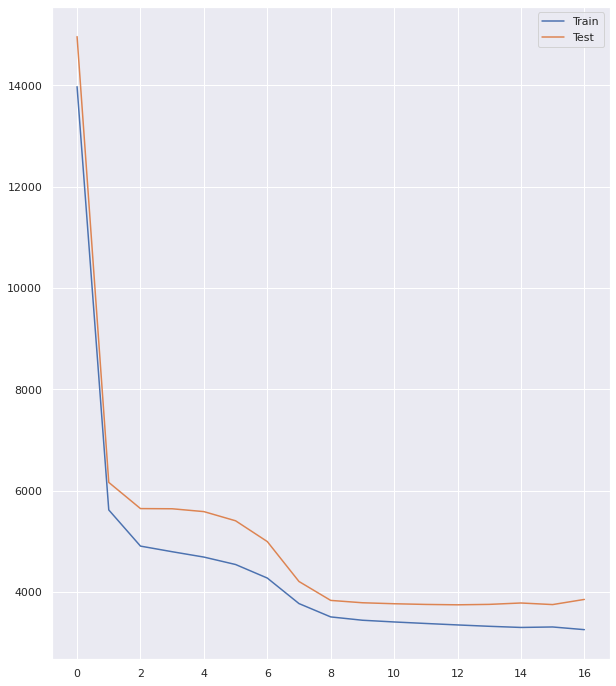

In [26]:
# установка константных состояний
random.seed(RAND_ST)
np.random.seed(RAND_ST)
torch.manual_seed(RAND_ST)
torch.use_deterministic_algorithms(True)

early_stoping = CustomEarlyStopping(min_delta=30)

# объединение и преобразование данных в float torch-тензоры
X_train = torch.FloatTensor(np.concatenate((sc_train, ohe_train, pca_train[:, [0, 1]]), axis=1))
X_test = torch.FloatTensor(np.concatenate((sc_test, ohe_test, pca_test[:, [0, 1]]), axis=1))
y_train = torch.FloatTensor(target_train.values)
y_test = torch.FloatTensor(target_test.values)

# вывод размерности полученных данных
print(f'Размер обучающей выборки после объединения признаков: {X_train.shape}')
print(f'Размер тестовой выборки после объединения признаков: {X_test.shape}')
print('-' * 20)

# количество слоев и нейронов
input_size = X_train.shape[1]
hidden_size_1 = 13
hidden_size_2 = 6
hidden_size_3 = 25
out_size = 1 
# количество эпох
num_epochs = 1000
# скорость обучения
learn = 0.18


# класс нейронной сети
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, hidden_size_3, out_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)  
        self.relu1 = nn.LogSigmoid()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)  
        self.relu2 = nn.Softplus()
        self.fc3 = nn.Linear(hidden_size_2, hidden_size_3)  
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size_3, out_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out


# функция инициализации весов и смещений
def init_weights(layer):
        if type(layer) == nn.Linear: # Проверка, что слой – полносвязный
            nn.init.kaiming_normal_(layer.weight, mode='fan_in')
            nn.init.normal_(layer.bias)


# создание нейронной сети
model = NeuralNet(input_size, hidden_size_1, hidden_size_2, hidden_size_3, out_size)

# инициализация весов и смещений
model.apply(init_weights)

# В качестве функции потерь используем MSE
loss = nn.MSELoss()  
# создаем Adam оптимизатор 
optimizer = torch.optim.Adam(model.parameters(), lr=learn)  

# списки для сохранения 
train_lost = []
test_lost = []
# лучший скор
best_rmse = np.inf

# Цикл обучения
for epoch in range(num_epochs):
    
    model.train()
    
    optimizer.zero_grad()
    
    preds = model.forward(X_train).flatten()
            
    loss_value = loss(preds, y_train)

    loss_value.backward()
            
    optimizer.step()
    
    # на каждой 30-й эпохе предсказываем температуру на тестовой выборке
    if epoch % 30 == 0 or epoch == num_epochs - 1:
        model.eval()
        test_preds = model.forward(X_test).flatten()
        rmse = ((test_preds.squeeze(-1) - y_test).pow(2).mean().item())**0.5
        
        # внесение метрики качества в заранее созданные списки
        train_lost.append(loss_value.item()**0.5)
        test_lost.append(rmse)
        
        print(f'Эпоха №{epoch}, RMSE на тестовой выборке: {rmse}')
    
        # сохранение лучшего результата
        if rmse < best_rmse:
            best_rmse = rmse
            best_predicted_temp = test_preds
            best_train_loss = loss_value
        
        # остановка обучения в случае признаков переобучения сети
        early_stoping(rmse)
        if early_stoping.early_stop:
            print('Early Stopping!!!')
            print(f'Best RMSE test {best_rmse}')
            break 
        
# график метрики качества        
df_gr = pd.DataFrame({'Train': train_lost, 'Test': test_lost})       
df_gr.plot(figsize=(10, 12))
plt.show();

**Вывод по работе базовой нейронной сети**:
- на **360 эпохе** достигнут лучший показатель метрики на тестовой выборке **RMSE - 3751 K**, что уже ниже максимального порога, установленного Заказчиком (**4500 K**);
- после **360 эпохи** модель **переобучается** и качество на тестовой выборку падает.

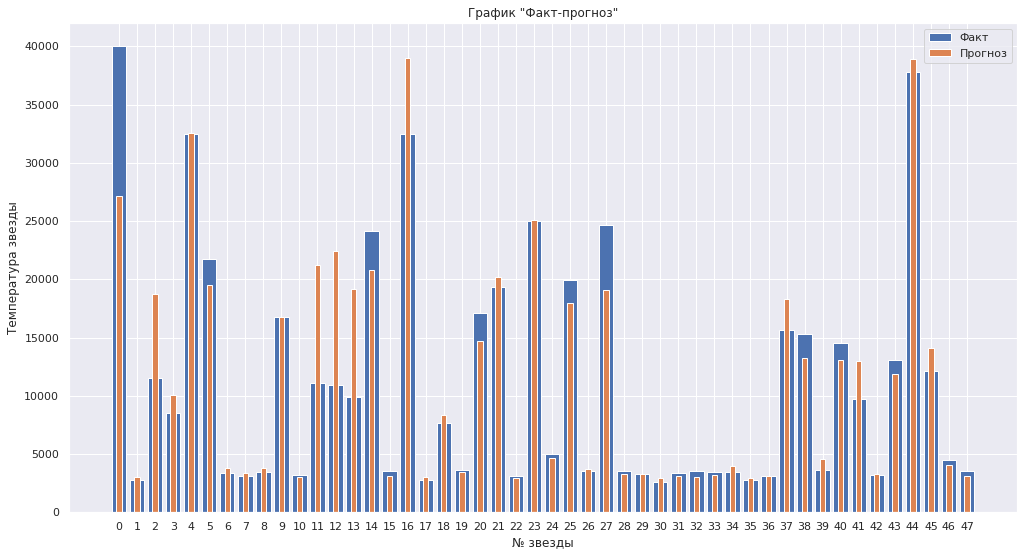

In [27]:
# функция для вывода качества регрессии факт-прогноз
def predcit_fact_graph(pred_test, y_test, detach=True):
    
    if detach:
        y1 = torch.FloatTensor(pred_test)
        y1 = y1.detach().numpy().reshape([-1])
        y2 = y_test.detach().numpy().reshape([-1])
    else:
        y1 = pred_test.reshape([-1])
        y2 = y_test.reshape([-1])
    x = np.arange(len(y1))

    fig, ax = plt.subplots(figsize=(17, 9))
    ax.set_xticks(x)
    fact = ax.bar(x, y2, width = 0.8, label = 'Факт')
    forecast = ax.bar(x, y1, width = 0.3, label = 'Прогноз')
    ax.legend()
    ax.set_title('График "Факт-прогноз"')
    ax.set_xlabel('№ звезды')
    ax.set_ylabel('Температура звезды')
    plt.show()
    
# вывод графика
predcit_fact_graph(best_predicted_temp, y_test)

In [28]:
df_test.iloc[[0, 2, 11, 12, 13, 16, 27]]

,luminos,radius,abs_magnitude,star_type,star_color,temp_anomal,log_luminos,log_radius,StarGroup
101,813000.0,14.000,-6.230,4,blue,1,5.910091,1.146128,4
161,251000.0,36.000,-6.245,4,blue,0,5.399674,1.556303,4
104,112000.0,12.000,-5.910,4,blue,0,5.049218,1.079181,4
227,783930.0,25.000,-6.224,4,blue,0,5.894277,1.397940,4
226,593900.0,80.000,-7.262,4,blue,0,5.773713,1.903090,4
215,173800.0,6.237,-4.360,3,blue,0,5.240050,0.794976,4
106,363000.0,63.000,-5.830,4,blue,0,5.559907,1.799341,4


Действительно, модель сильно ошибается на **синих** звездах, характеристики которых соответствуют **горячим звездам**.

**Вывод:**
Базовая нейронная сеть показывает не плохие результаты в предсказании температуры звезд на тестовой выборке (**RMSE - 3751 K**). Но на некоторых звездах (**№101, №161, № 104, №227, №226, №215, №106**) модель ошибается **более чем на 5000 K** и в 5 случаях из 7 в большую сторону. Скорее всего это связано с тем, что в выборке присутсвуют звезды, которые при тех же близких характеристиках, имеют все же более *низкую температуру*. Возможно при большей выборке нейронная сеть смогла бы обучиться отличать такие звезды.

## Улучшение нейронной сети

Далее с помощью библиотеки `'Scorch'` и `'RandomizedSearchCV'` будет подобран гиперпараметр `'lr'`, а так же методы регуляризации `'dropout'` и `'BatchNorm'`.

In [34]:
torch.manual_seed(RAND_ST)
random.seed(RAND_ST)
np.random.seed(RAND_ST)

# объединение и преобразование данных в float torch-тензоры
X_train = (np.concatenate((sc_train, ohe_train, pca_train[:, [0, 1]]), axis=1)).astype(np.float32)
X_test = (np.concatenate((sc_test, ohe_test, pca_test[:, [0, 1]]), axis=1)).astype(np.float32)
y_train = (target_train.values.reshape(-1, 1)).astype(np.float32)
y_test = (target_test.values.reshape(-1, 1)).astype(np.float32)

# вывод размерности полученных данных
print(f'Размер обучающей выборки после объединения признаков: {X_train.shape}')
print(f'Размер тестовой выборки после объединения признаков: {X_test.shape}')
print('-' * 20)

# создание класса нейронной сети
class Net(nn.Module):
    def __init__(self, 
                 dropout=0, 
                 bn=False, 
                 input_size = X_train.shape[1],
                 hidden_size_1 = 13,
                 hidden_size_2 = 6,
                 hidden_size_3 = 25,
                 out_size = 1 
                ):
        super(Net, self).__init__()
        self.drop_val = dropout
        self.bn_flag = bn
        
        # слои нейронной сети
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        if bn:
            self.bn1 = nn.BatchNorm1d(hidden_size_1)
        self.relu1 = nn.LogSigmoid()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.relu2 = nn.Softplus()
        self.fc3 = nn.Linear(hidden_size_2, hidden_size_3) 
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size_3, out_size) 
        
    def forward(self, x):
        out = self.fc1(x)
        if self.bn_flag:
            out = self.bn1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = nn.functional.dropout(out, self.drop_val)
        out = self.relu2(out)
        out = self.fc3(out)
        out = nn.functional.dropout(out, self.drop_val)
        out = self.relu3(out)
        out = self.fc4(out)
        return out
        

# создание NeuralNetRegressor из пакета Scorch
net = NeuralNetRegressor(
    Net,
    max_epochs=250,
    optimizer=torch.optim.Adam,
    criterion=torch.nn.MSELoss,
    train_split=None,
    device='cpu',
    verbose=0
)

# параметры для побора гиперпараметров 
params = {
    'module__dropout': np.arange(0.0, 0.9, 0.1),
    'module__bn': [True, False],
    'lr': np.arange(0.05, 0.6, 0.05),
}

# RandomizedSearchCV для поиска лучших гиперпараметров
rs = RandomizedSearchCV(net, params, scoring='neg_mean_squared_error', cv=4, random_state=RAND_ST, verbose=2)
rs.fit(X_train, y_train)

# вывод результатов
print(rs.best_params_)
print(f'RMSE на валидационной выборке при 4-х фолдах кроссвалидации: {abs(rs.best_score_)**0.5}')

Размер обучающей выборки после объединения признаков: (192, 18)
Размер тестовой выборки после объединения признаков: (48, 18)
--------------------
Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] END ......lr=0.2, module__bn=False, module__dropout=0.1; total time=   9.5s
[CV] END ......lr=0.2, module__bn=False, module__dropout=0.1; total time=   9.9s
[CV] END ......lr=0.2, module__bn=False, module__dropout=0.1; total time=  10.1s
[CV] END ......lr=0.2, module__bn=False, module__dropout=0.1; total time=   8.7s
[CV] END lr=0.35000000000000003, module__bn=False, module__dropout=0.1; total time=   8.8s
[CV] END lr=0.35000000000000003, module__bn=False, module__dropout=0.1; total time=   9.1s
[CV] END lr=0.35000000000000003, module__bn=False, module__dropout=0.1; total time=  10.1s
[CV] END lr=0.35000000000000003, module__bn=False, module__dropout=0.1; total time=   9.7s
[CV] END ......lr=0.55, module__bn=True, module__dropout=0.5; total time=  14.9s
[CV] END ......lr=0.55,

In [35]:
# предсказание лучшей модели на тестовой выборке
test_pred = rs.best_estimator_.predict(X_test)
# вывод метрики качества на тестовой выборке
print(f'RMSE лучшей модели на тестовой выборке: {np.mean((test_pred - np.array(y_test)) ** 2)**0.5}')

RMSE лучшей модели на тестовой выборке: 4088.9675958608427


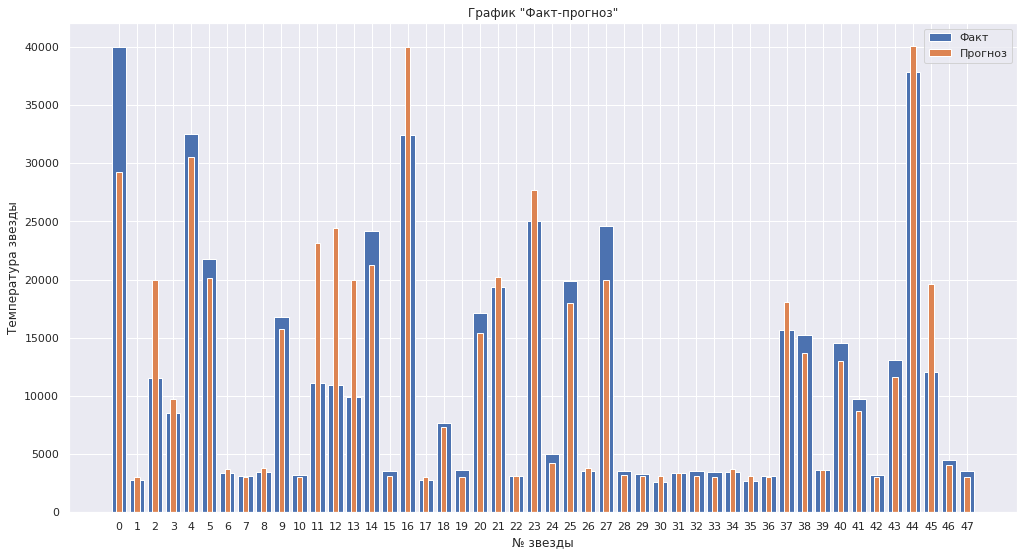

In [36]:
# вывод графика Факт-Прогноз
predcit_fact_graph(test_pred, y_test, detach=False) 

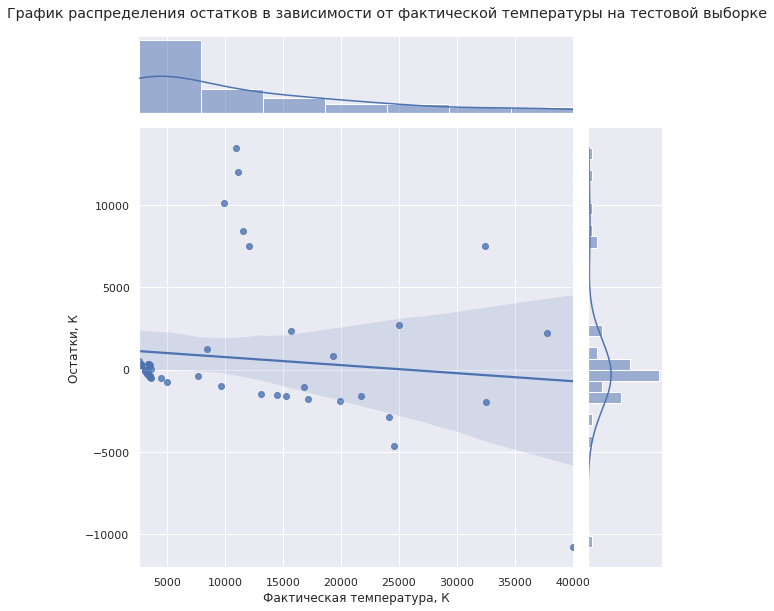

In [37]:
# вывод графика распределения остатков в зависимости от фактической температуры на тестовой выборке
h = sns.jointplot(x=y_test.reshape(-1), y=(test_pred - y_test).reshape(-1), kind='reg', height=8)
plt.suptitle('График распределения остатков в зависимости от фактической температуры на тестовой выборке', y=1.03)
h.set_axis_labels('Фактическая температура, К', 'Остатки, К')
plt.show();

In [38]:
df_test.iloc[[0, 2, 11, 12, 13, 16, 27, 45]]

,luminos,radius,abs_magnitude,star_type,star_color,temp_anomal,log_luminos,log_radius,StarGroup
101,813000.0,14.000,-6.230,4,blue,1,5.910091,1.146128,4
161,251000.0,36.000,-6.245,4,blue,0,5.399674,1.556303,4
104,112000.0,12.000,-5.910,4,blue,0,5.049218,1.079181,4
227,783930.0,25.000,-6.224,4,blue,0,5.894277,1.397940,4
226,593900.0,80.000,-7.262,4,blue,0,5.773713,1.903090,4
215,173800.0,6.237,-4.360,3,blue,0,5.240050,0.794976,4
106,363000.0,63.000,-5.830,4,blue,0,5.559907,1.799341,4
178,120000.0,708.900,-7.840,5,blue-white,0,5.079181,2.850585,0


Выводы по работе улучшенной модели нейронной сети:
- с помощью библиотеки `Scorch` было создано решение для подбора гиперпараметров нейронной сети, основанной на бейзлайн модели. Гиперпараметры были подобраны с помощью `RandomizedGridSearch` с перекрестной проверкой на 4-х фолдах;
- результат лучшей модели: **RMSE на валидационной выборке - 3939 K**, **RMSE на тестовой выборке - 4089**, что ниже порога, установленного Заказчиком (**4500 К**);
- параметры лучшей модели: `'max_epoch'`: **250**, `'module__dropout'`: **0.0**, `'module__bn'`: **False**, `'lr'`: **0.45**;
- согласно графика **Факт-прогноз**, улучшенная модель так же как и базовая сильно ошибается (**более чем на 5000 К**) на **синих** звездах с индексами **№101, №161, № 104, №227, №226, №215, кроме №106** (на ней модель улучшила результат). В то же время в отличие от базовой, улучшенная модель допустила серъезную ошибку на **сине-белой** звезде с индексом **№178**;
- **распределение общих остатков** на тестовой выборке **не гомоскедастично**: дисперсия ошибок растет с увеличением фактической температуры; так же при температурах **10 000 - 12 000 K** модель предсказывает сильно завышенные значения температуры для **синих** звезд. 

## Выводы

Исходя из сравнения результатов исследования и разработки двух моделей нейронных сетей: бейзлайн и улучшенной (с подбором гиперпараметров и регуляризацией с помощью `Dropout`и `Batchnorm`) можно сделать следующие выводы:
- лучшее качество модели нейронной сети достигнуто без использования методов регуляризации `Dropout`и `Batchnorm`;
- подбор гиперпараметров не привел к улучшению метрики **RMSE**, а даже наоборот немного ухудшил этот показатель на тестовой выборке. Ухудшение можно объяснить использованием во втором случае кросс-валидации на 4-х фолдах и усреднением результатов на дополнительной валидационной выборке. Таким образом качество модели стало более стабильным без риска переобучения, но с немного худшим показателем `RMSE` на тестовой выборке;
- для второй модели **количество эпох** было ограничено **в 250**;
- обе модели показали хорошее качество, но Заказчику рекомендуется к использованию вторая модель, как более устойчивая по качеству с учетом случайно выбранного псевдослучайного состояния при работе с данными и проектировании модели (**параметра RAND_SD**).

### Рекомендации:
1. Уточнить у Заказчика: стратифицирована ли выборка по **типу звезд** и как проводился отбор звезд для обучения.
2. Уточнить у Заказчика: допустимые пределы значений для представленных в выборке признаков, чтобы обработать аномальные значения, которые потенциально могут вносить сильные искажения на такой малой выборке.
3. Предложить Заказчику подобрать и использовать более подходящую модель, основанную на деревьях решений, для предсказания на табличных данных: **RandomForest, XGBoost, CatBoost, LightGBM**.